In [48]:
import os, sys
root_dir = os.path.dirname(os.getcwd())
sys.path.append(root_dir)
import tensorflow as tf
import scipy.io
import numpy as np

from config import Config
from Model.Auto_encoder import Auto_encoder as Model
from Testing.Eval import Evaler
from Testing import utils
import mywarper

In [4]:
class TempConfig(Config):
    NAME = "Face Auto Encoder"
    ## Input pipeline
    DATA_DIR = os.path.join(root_dir, "DataSet")
    BATCH_SIZE = 100
    SUMMARY = False
    SAVE = False

# Create a global configuration object
config = TempConfig()

In [5]:
## Specify the trained weights localtion
save_dir = os.path.join(root_dir, "Training/Weight")  # Folder that saves the trained weights
Run = None
epoch = None

In [6]:
Eval = Evaler(config, save_dir)

output = Eval.evaler(Model, dir_names=Run, epoch=epoch)

INFO:tensorflow:Restoring parameters from /home/wenyuan/Documents/Project/231/231_Project1/Auto_Encoder/Training/Weight/Run_2018-10-28_18_40_21/model_0300.ckpt


In [39]:
im = output[1][0] * 255

In [41]:
im = im[50:, :, :, :]

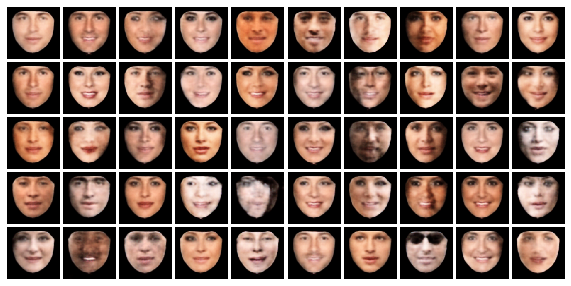

In [42]:
fig_org = utils.plot(im, 5, 10, 3, 128, 128)
fig_org.savefig("1_50_recons_aligned_faces.png")

## Read in the mean warping

In [43]:
mdict = scipy.io.loadmat("PCA_eigen_mean_warping.mat")
mean_LM = mdict["mean_warping"]
Mean_LM = mean_LM.reshape(68, 2)

In [44]:
lm = output[1][2] * 128
lm = lm.reshape((lm.shape[0], 68, 2))
lm = lm[50:, :, :]

In [49]:
for i in range(im.shape[0]):

    final_im = mywarper.warp(im[i, :, :, :], Mean_LM, lm[i, :, :])
    if i == 0:
        Final_im = np.expand_dims(final_im, axis = 0)
    else:
        Final_im = np.concatenate([Final_im, np.expand_dims(final_im, axis = 0)], axis = 0)

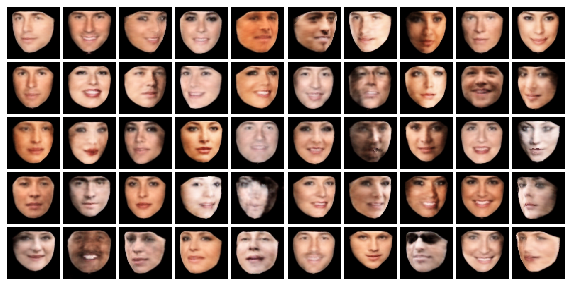

In [51]:
fig_cons = utils.plot(Final_im, 5, 10, 3, 128, 128)
fig_org.savefig("2_50_recons_faces.png")